#Introduction
This Colab project demonstrates the process of building and training a Convolutional Neural Network (CNN) to classify plant diseases from images. Utilizing the agri_dataset, the project focuses on identifying different conditions in tomato leaves: 'Tomato___Early_blight', 'Tomato___Healthy', and 'Tomato___Late_blight'. The workflow includes loading and extracting the dataset, preparing the image data using ImageDataGenerator for training and validation, defining a sequential CNN model architecture, compiling the model with appropriate loss function and optimizer, training the model on the prepared data, and visualizing the training progress through accuracy and loss plots. Finally, the project attempts to predict the class of a new, unseen image using the trained model.

##Upload the data set

In [1]:
from zipfile import ZipFile
import os

# Upload your zip file to Colab manually first
from google.colab import files
uploaded = files.upload()  # Upload agri_dataset.zip

# Extract it
with ZipFile("agri_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("agri_dataset")

# Check class folders
import os
os.listdir("agri_dataset")

Saving agri_dataset.zip to agri_dataset.zip


['agri_dataset']

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Set up paths and parameters
data_dir = "agri_dataset/agri_dataset"
img_size = (128, 128)
batch_size = 16

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)


Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Classes: ['Tomato___Early_blight', 'Tomato___Healthy', 'Tomato___Late_blight']


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 448ms/step - accuracy: 0.3817 - loss: 1.5119 - val_accuracy: 0.3333 - val_loss: 1.0712
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 514ms/step - accuracy: 0.4959 - loss: 0.9990 - val_accuracy: 0.6833 - val_loss: 0.7361
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 424ms/step - accuracy: 0.6894 - loss: 0.6961 - val_accuracy: 0.4500 - val_loss: 0.8642
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 506ms/step - accuracy: 0.8396 - loss: 0.4416 - val_accuracy: 0.7500 - val_loss: 0.6349
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 423ms/step - accuracy: 0.8982 - loss: 0.2759 - val_accuracy: 0.6667 - val_loss: 0.6283
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 507ms/step - accuracy: 0.9608 - loss: 0.1511 - val_accuracy: 0.7000 - val_loss: 0.7305
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 413ms/step - accuracy: 0.9420 - loss: 0.2211 - val_accuracy: 0.7333 - val_loss: 0.9439
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 503ms/step - accuracy: 0.9404 - loss: 0.1411 - val_accuracy: 0.8000 - val_

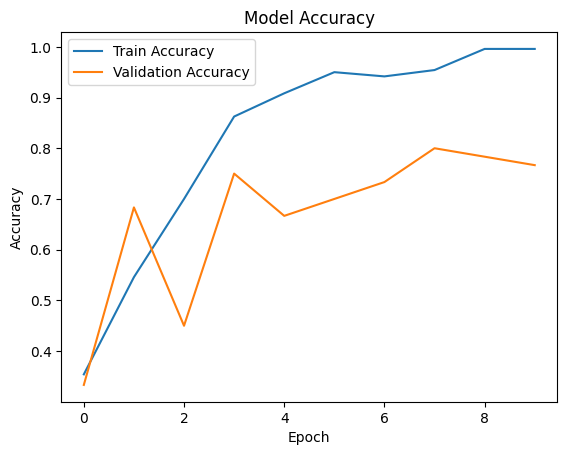

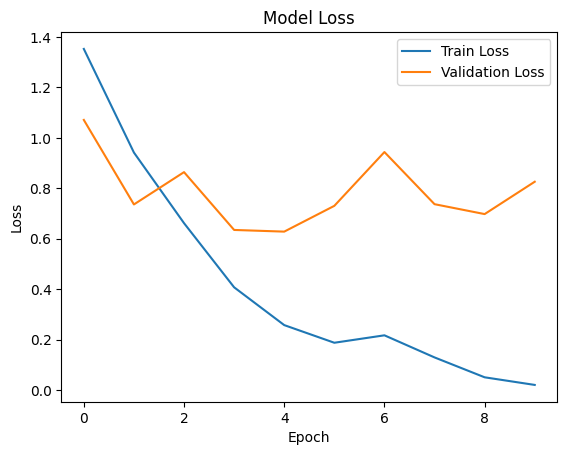

In [6]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [9]:
from tensorflow.keras.preprocessing import image

# Upload a test leaf image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load and preprocess
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]
print(f"Predicted Class: {predicted_class}")


Saving 84cbb98b-5c2f-4367-8d78-52be491e66bd___GH_HL Leaf 336.JPG to 84cbb98b-5c2f-4367-8d78-52be491e66bd___GH_HL Leaf 336.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted Class: Tomato___Healthy


#Conclusion
The trained CNN model achieved a high training accuracy, demonstrating its ability to learn patterns within the provided dataset. However, the validation accuracy shows some fluctuation and is lower than the training accuracy, suggesting potential overfitting. The model's performance on unseen data, as shown by the attempt to predict a single image, highlights the practical application but also the need for further evaluation on a larger, independent test set. Future work could involve techniques to mitigate overfitting, such as increased data augmentation, regularization, or exploring more complex model architectures. Additionally, deploying this model for real-world plant disease detection would require rigorous testing and optimization for various environmental conditions and image sources